In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [40]:
df = pd.read_csv('/content/drive/MyDrive/ex1data2.csv' )



In [41]:
X = df[['Size', 'Bedroom']] 
y = df['Price']
m = len(y)
X.fillna(X.mean()) 
X = X.fillna(X.mean()) 
X.head()

,Size,Bedroom
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [42]:
def featureNormalize(X):
  
    X_norm = (X-np.mean(X))/np.std(X) 
    mu = np.mean(X) 
    sigma = np.std(X) 
    return X_norm, mu, sigma 

X, mean, std = featureNormalize(X)

In [ ]:
X = np.append(np.ones([m,1]), X, axis=1) 
y = np.array(y).reshape(-1,1) 
theta = np.zeros([3,1]) 


In [44]:

def computeCostMulti(X,y, theta):
  
    m = len(y) 
    h = X.dot(theta) 
    J = 1/(2*m)*(np.sum((h-y)**2)) 
    return J

cost = computeCostMulti(X,y,theta) 
print(cost)

65591548106.45744


In [45]:
# Applying Gradient Descent Algorithm
def gradientDescentMulti(X, y, theta, alpha, iter):

    J_history = [] 
    m = len(y) 
    for i in range(iter): 
        h = X.dot(theta) 
        theta = theta - ((alpha/m)*(X.T.dot(h-y))) 
        J_history.append(computeCostMulti(X, y, theta)) 
    return theta, J_history 

iter = 500 
alpha = 0.03 

In [46]:
new_theta, J_history = gradientDescentMulti(X, y, theta, alpha, iter)
print (new_theta)

[[340412.57680449]
 [109372.3081412 ]
 [ -6502.86652974]]


In [47]:
new_cost = computeCostMulti(X,y,new_theta) 
print(new_cost)

2043282558.1276078


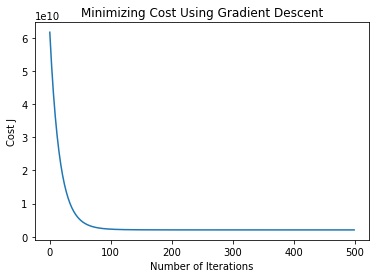

In [50]:
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Number of Iterations')
plt.title('Minimizing Cost Using Gradient Descent')
theta_1, J_history_1 = gradientDescentMulti(X, y, theta, 0.3, 50)
theta_2, J_history_2 = gradientDescentMulti(X, y, theta, 0.1, 50)
theta_3, J_history_3 = gradientDescentMulti(X, y, theta, 0.03, 50)
theta_4, J_history_4 = gradientDescentMulti(X, y, theta, 0.01, 50)
theta_5, J_history_5 = gradientDescentMulti(X, y, theta, 0.003, 50)
theta_6, J_history_6 = gradientDescentMulti(X, y, theta, 0.001, 50)
theta_7, J_history_7 = gradientDescentMulti(X, y, theta, 0.009, 50)

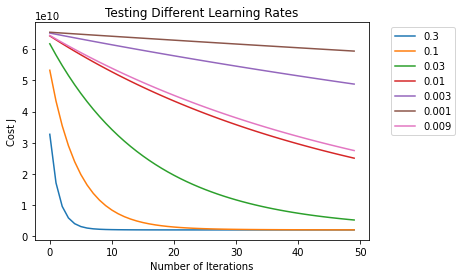

In [52]:
plt.plot(J_history_1, label='0.3')
plt.plot(J_history_2, label='0.1')
plt.plot(J_history_3, label='0.03')
plt.plot(J_history_4, label='0.01')
plt.plot(J_history_5, label='0.003')
plt.plot(J_history_6, label='0.001')
plt.plot(J_history_7, label='0.009')
plt.title('Testing Different Learning Rates')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend(bbox_to_anchor=(1.05, 1.0))

In [30]:
# Perdict Function
X = np.array([1650,3])
X = (X-mean)/std
X = np.append(1, X)
X = np.reshape(X, (1,3))
print(X)

[[ 1.         -0.44604386 -0.22609337]]


In [31]:

def prediction(X, theta):
  
    return np.dot(X, theta)

pred = prediction(X, new_theta)
print(pred)

[[293097.98526087]]


## **Finding thetas using normal equation.**
**Normal equation: ((X^T.X)^-1).X^T.y**

X^T = X transpose, ^-1 means inverse of the expression in the parenthesis.

In [32]:

def calc_theta_neq(X,y):
    
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [ ]:
theta = calc_theta_neq(X, y)
print(theta)
features = np.array([1, 1650, 3]

In [19]:

def prediction(X, theta):
    
    price = theta.dot(features)
    return price
  



In [20]:

price = prediction(theta, features)
print("The predicted price is: ", round(price))

The predicted price is:  2722510
